In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('weather.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No


In [5]:
data.shape

(142193, 24)

In [6]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

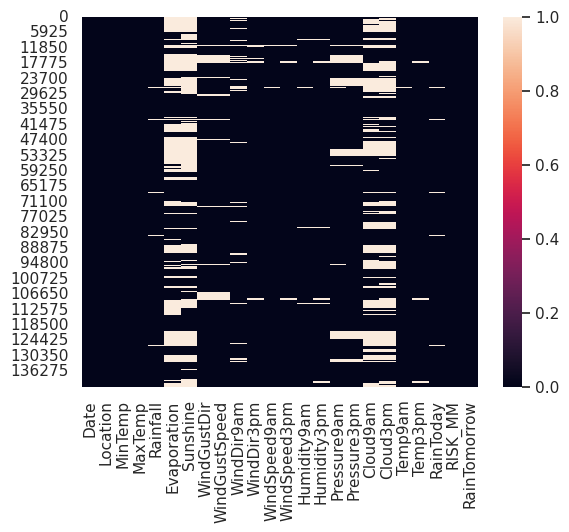

In [7]:
sns.set()
sns.heatmap(data.isnull())
plt.show()

In [8]:
nan_data = data.isnull().sum()/data.shape[0]*100
nan_data

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64

In [9]:
drop_data = nan_data[nan_data>30].keys()

In [10]:
drop_data

Index(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], dtype='object')

In [11]:
new_data = data.drop(columns=drop_data)

In [12]:
new_data.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No


In [13]:
new_data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [14]:
new_data.isnull().sum()/new_data.shape[0]*100

Date             0.000000
Location         0.000000
MinTemp          0.447983
MaxTemp          0.226453
Rainfall         0.988797
WindGustDir      6.561504
WindGustSpeed    6.519308
WindDir9am       7.041838
WindDir3pm       2.656952
WindSpeed9am     0.948007
WindSpeed3pm     1.849599
Humidity9am      1.247600
Humidity3pm      2.538803
Pressure9am      9.855619
Pressure3pm      9.832411
Temp9am          0.635756
Temp3pm          1.917113
RainToday        0.988797
RISK_MM          0.000000
RainTomorrow     0.000000
dtype: float64

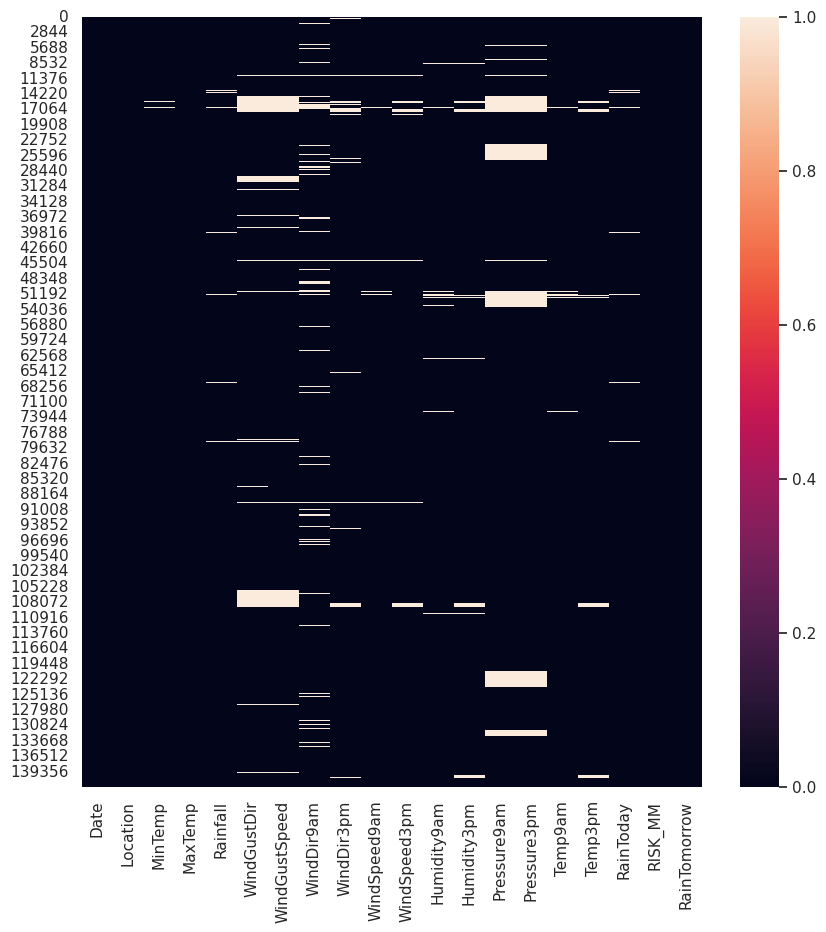

In [15]:
plt.figure(figsize=(10,10))
sns.set()
sns.heatmap(new_data.isnull())

plt.show()

In [16]:
missing_columns = [x for x in new_data.columns if new_data[x].isnull().sum()>0]
#numeric_data_column = new_data.select_dtypes(include=['int64','float64'])

In [17]:
missing_columns
#numeric_data_column

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [18]:
#missing_value = [x for x in numeric_data_column.columns if numeric_data_column[x].isnull().sum()>0]

In [19]:
#missing_value

In [20]:
'''plt.figure(figsize=(25,25))
sns.set()
for i,var in enumerate(missing_value):
    plt.subplot(6,2,i+1)
    sns.distplot(numeric_data_column[var],bins=20,kde_kws ={'linewidth':5,'color':'r'})'''

"plt.figure(figsize=(25,25))\nsns.set()\nfor i,var in enumerate(missing_value):\n    plt.subplot(6,2,i+1)\n    sns.distplot(numeric_data_column[var],bins=20,kde_kws ={'linewidth':5,'color':'r'})"

In [21]:
#fill_nan_mean = numeric_data_column.fillna(numeric_data_column.mean())

In [22]:
#fill_nan_mean.isnull().sum().sum()

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
#for i,x in enumerate(new_data):

#new_data[[missing_value]] = new_data[[missing_value]].apply(LabelEncode(),fit_transform)
new_data = new_data.apply(LabelEncoder().fit_transform)

In [25]:
new_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396,2,213,262,6,13,21,13,14,11,13,71,22,215,232,223,261,0,0,0
1,397,2,153,284,0,14,21,6,15,2,12,44,25,244,239,226,286,0,0,0
2,398,2,208,290,0,15,22,13,15,10,14,38,30,214,248,264,275,0,0,0
3,399,2,171,313,0,4,10,9,0,6,5,45,16,314,290,235,308,0,10,0
4,400,2,254,356,10,13,19,1,7,4,11,82,33,246,221,232,340,0,2,0


In [26]:
new_data['WindGustDir'].unique()

array([13, 14, 15,  4,  6,  3,  5, 12,  1, 10,  8,  7,  9,  2, 16,  0, 11])

In [27]:
mean_data = new_data.fillna(new_data.mean())

In [28]:
mean_data.isnull().sum().sum()

0

<AxesSubplot: >

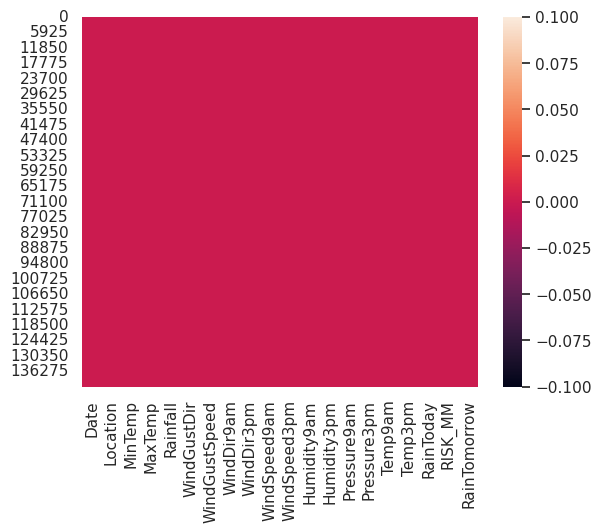

In [29]:
sns.heatmap(mean_data.isnull())

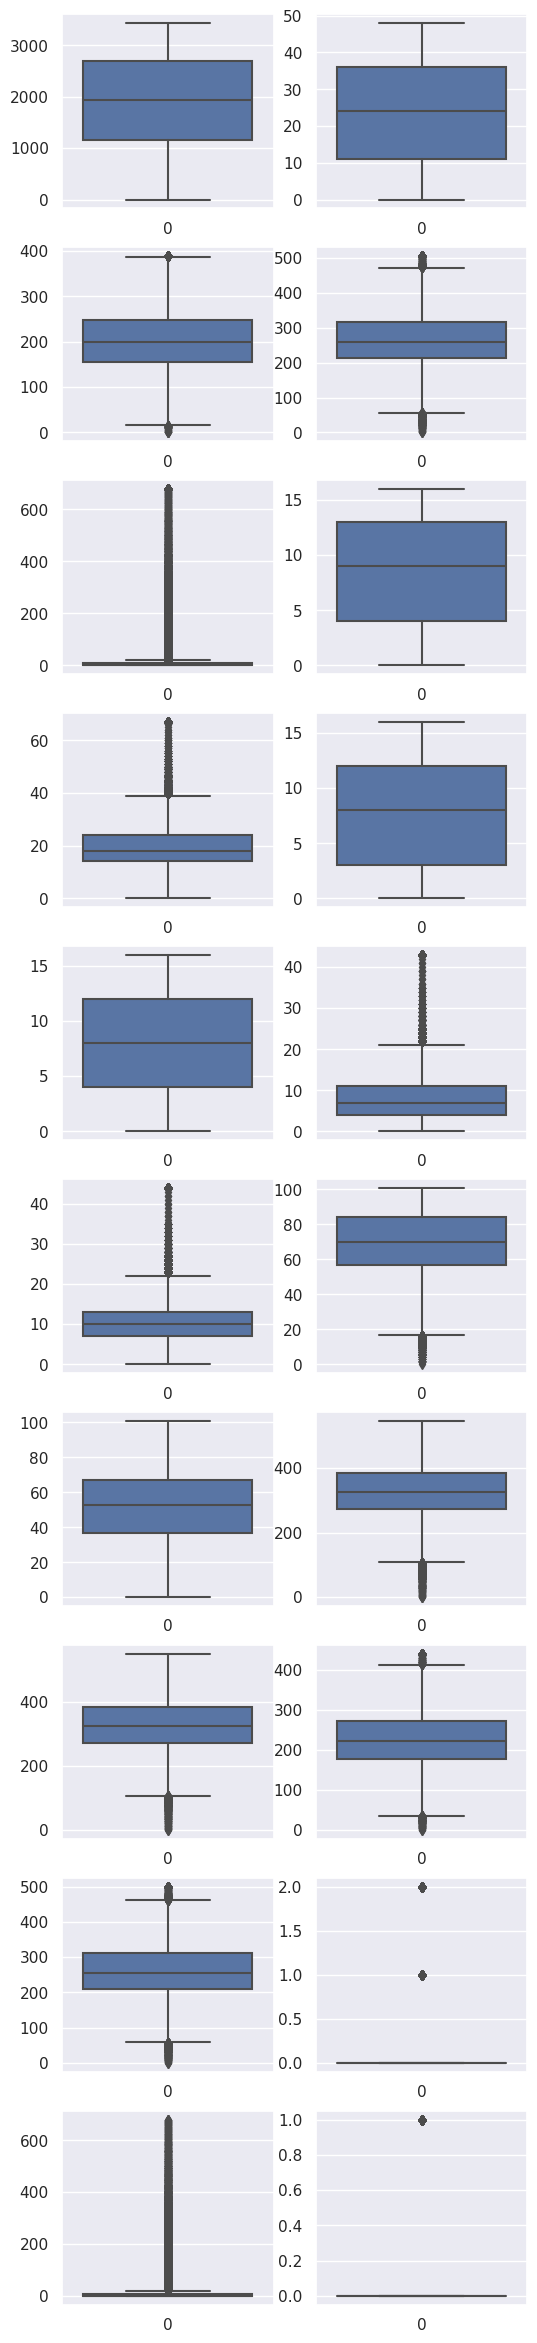

In [59]:
plt.figure(figsize=(6,60))
for i,x in enumerate(mean_data):
    plt.subplot(20,2,i+1)
    sns.boxplot(mean_data[x])

/tmp/ipykernel_54276/2827332991.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_data[x],color='g')
/tmp/ipykernel_54276/2827332991.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_data[x],color='g')
/tmp/ipykernel_54276/2827332991.py:4: UserWarning: 

`distplot` is a deprecated 

/tmp/ipykernel_54276/2827332991.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_data[x],color='g')
/tmp/ipykernel_54276/2827332991.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_data[x],color='g')


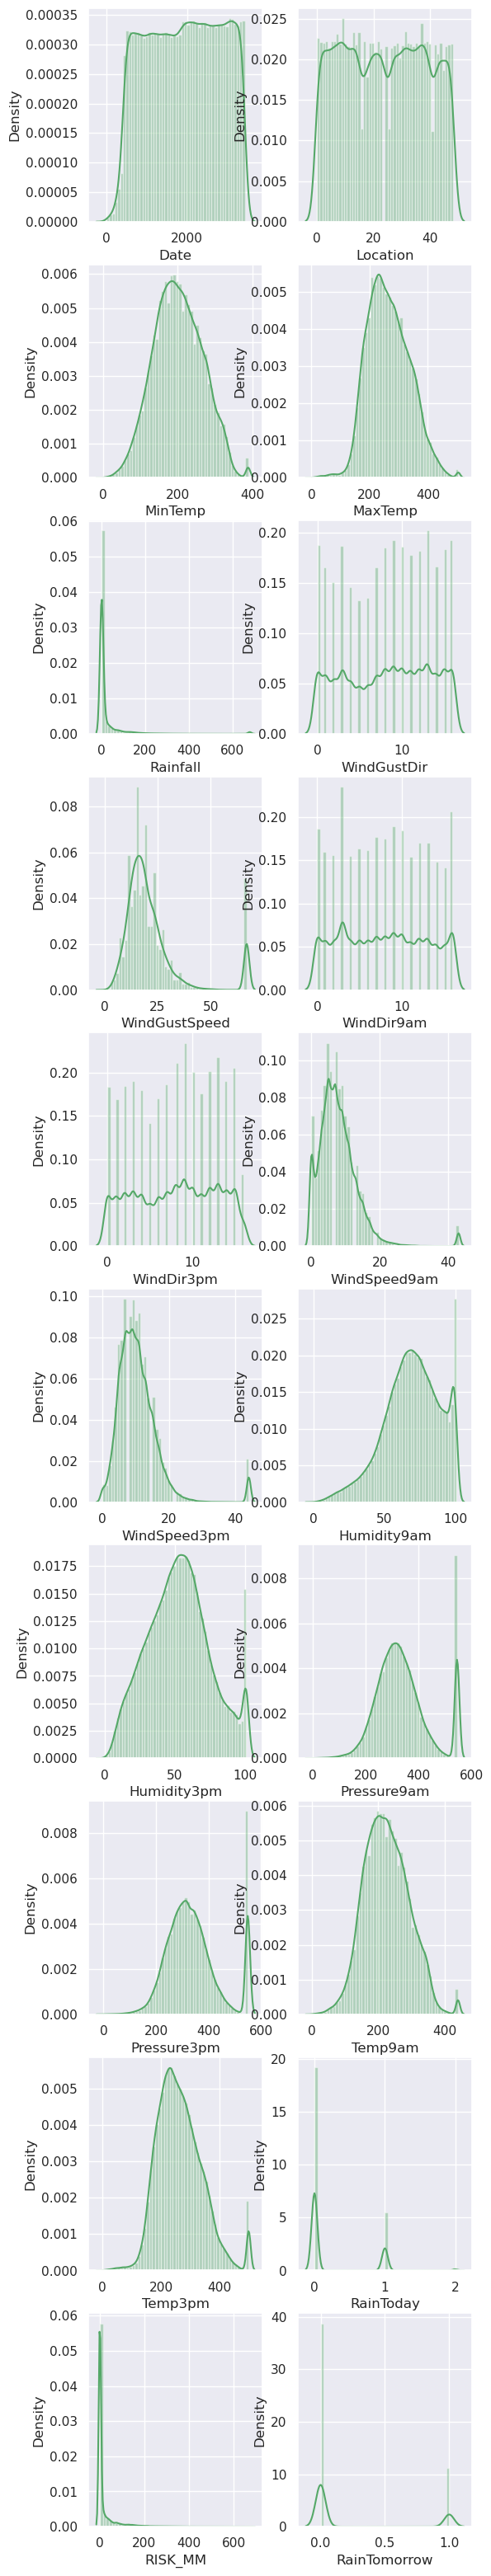

In [64]:
plt.figure(figsize=(6,80))
for i,x in enumerate(mean_data):
    plt.subplot(20,2,i+1)
    sns.distplot(mean_data[x],color='g')

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

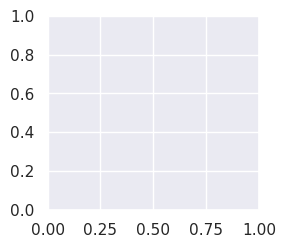

In [75]:
plt.figure(figsize=(6,60))
for i,x in enumerate(mean_data):
    plt.subplot(20,2,i+1)
    sns.pairplot(mean_data[x])
    

In [30]:
#for i,x in enumerate(mean_data.columns):



# All nan Values has disappeared from this data_set

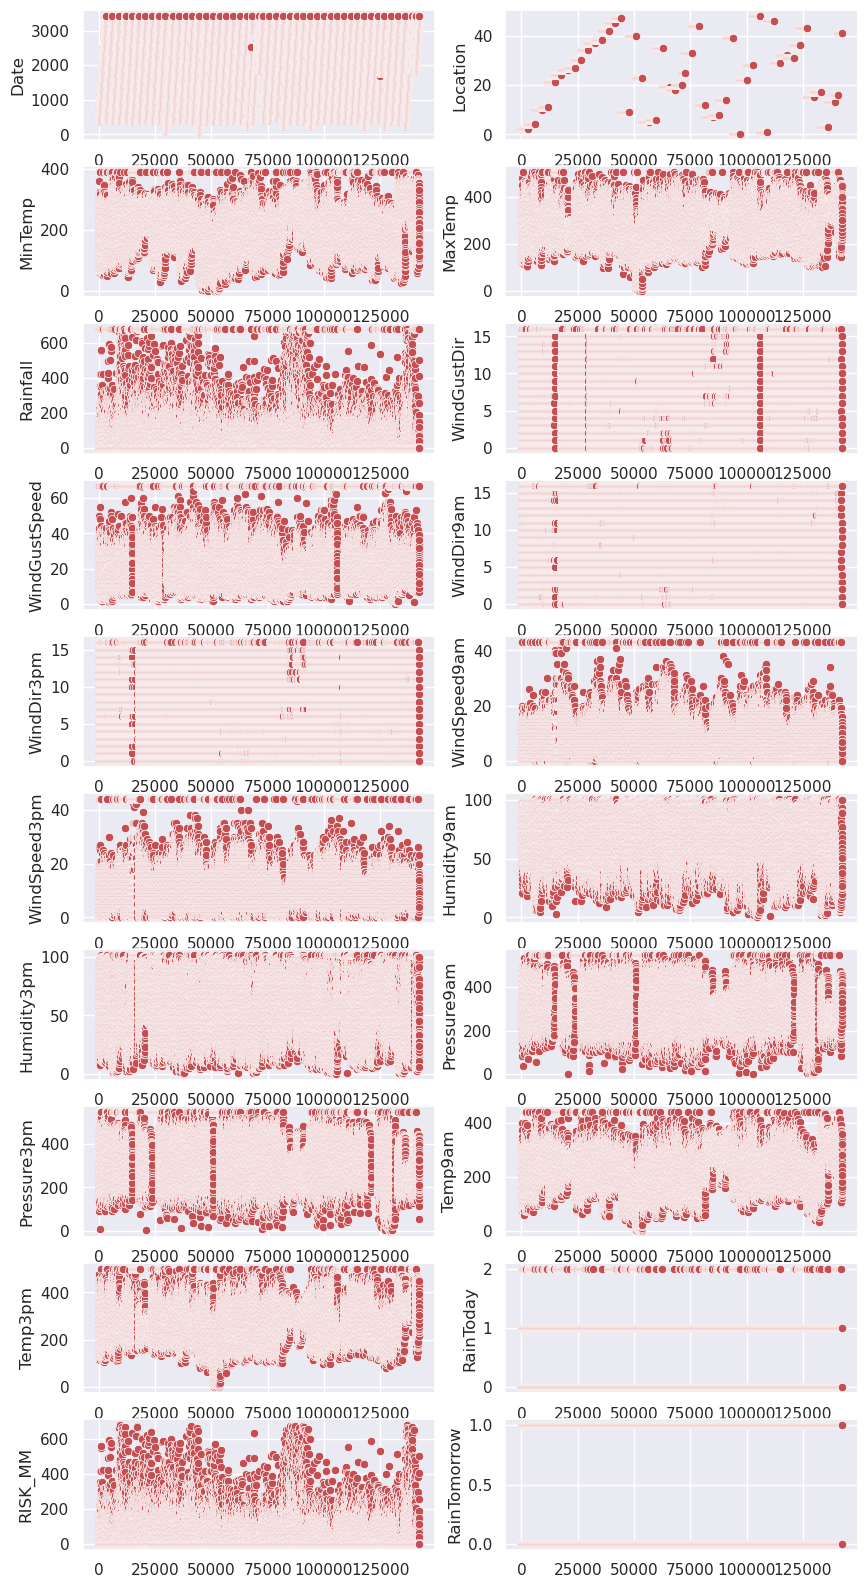

In [31]:
plt.figure(figsize=(10,20))
for i,x in enumerate(mean_data):
    plt.subplot(10,2,i+1)
    sns.scatterplot(mean_data[x],color='r')
    #sns.lineplot(data[x],color='g')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
data = [x for x in mean_data.columns]
data

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

In [34]:
x = mean_data[['MinTemp','MaxTemp','Rainfall','WindGustDir',
               'WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am',
               'Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday','RISK_MM']]
y = mean_data['RainTomorrow']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2)

In [36]:
model = LogisticRegression()
model.fit(x_train,y_train)

/home/anmino/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
model.coef_

array([[ 2.45503930e-02, -6.56702274e-02, -1.03090704e-03,
        -4.46207048e-02, -1.21472791e-02, -5.18193596e-02,
        -7.29885882e-02, -8.30896469e-02, -3.71961586e-02,
        -8.19422169e-02, -5.20422132e-02, -9.05460500e-03,
        -7.32358208e-04, -7.84855468e-04,  1.41856595e-02,
         5.70949908e-04,  2.13093932e+00]])

model.intercept_

In [38]:
a = model.predict(x_test)
a

array([1, 0, 0, ..., 1, 1, 0])

In [39]:
x_train

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM
37798,64,152,0,8,16,3,10,3,7,75,30,419,426,101,158,0,0
2113,269,385,0,0,15,10,9,4,5,60,34,312,309,310,368,0,0
78340,194,240,0,3,29,4,3,6,11,60,50,308,295,214,244,0,0
126844,181,223,0,11,24,0,9,4,9,65,65,190,170,195,213,0,74
77243,141,184,0,12,20,16,12,0,9,93,90,354,379,138,170,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132934,310,411,0,2,29,1,0,7,20,27,14,227,218,371,409,0,0
13374,115,218,0,13,11,4,13,4,8,78,34,312,303,170,224,0,0
75286,224,257,0,2,23,0,2,8,16,74,62,354,352,228,258,0,0
44066,173,214,0,15,17,15,1,10,5,54,46,352,380,208,220,0,0


In [40]:
y_train

37798     0
2113      0
78340     0
126844    1
77243     1
         ..
132934    0
13374     0
75286     0
44066     0
112995    1
Name: RainTomorrow, Length: 28438, dtype: int64

In [41]:
m = model.score(x_train,y_train)
m

0.9961319361417821

In [42]:
2,213,262,6,13,21,13,14,11,13,71,22,215,232,223,261,0,0,0
from sklearn.metrics import classification_report

In [43]:
#g = classification_report(y_train,a)
#print(g)

In [44]:
250,302,187,1,14,10,9,3,3,99,70,546,549,253,291,1
new_data.iloc[24638]

Date             1507
Location           30
MinTemp           250
MaxTemp           302
Rainfall          187
WindGustDir         1
WindGustSpeed      14
WindDir9am         10
WindDir3pm          9
WindSpeed9am        3
WindSpeed3pm        3
Humidity9am        99
Humidity3pm        70
Pressure9am       546
Pressure3pm       549
Temp9am           253
Temp3pm           291
RainToday           1
RISK_MM            18
RainTomorrow        1
Name: 24638, dtype: int64

In [45]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': a})
pred_df

,Actual,Predicted
125346,1,1
16099,0,0
118301,0,0
36658,0,0
25932,0,0
...,...,...
69525,0,0
16406,1,1
3064,1,1
86605,1,1
